In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [12]:
df = pd.read_csv('dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


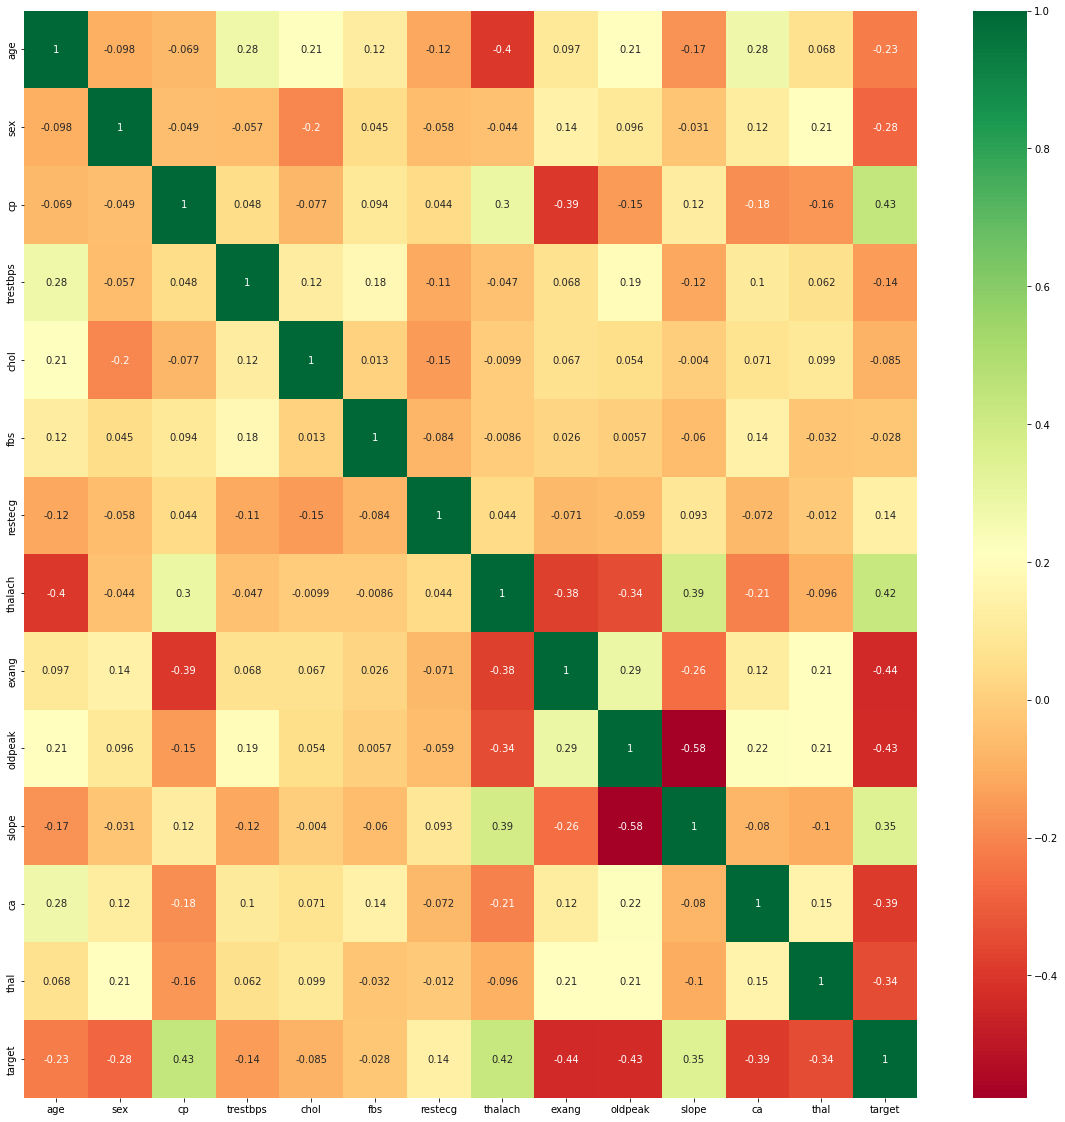

In [15]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

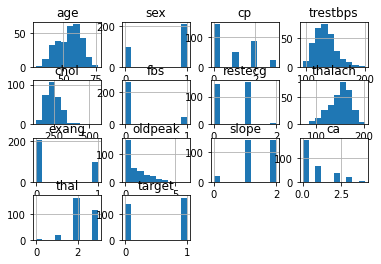

In [16]:
df.hist()

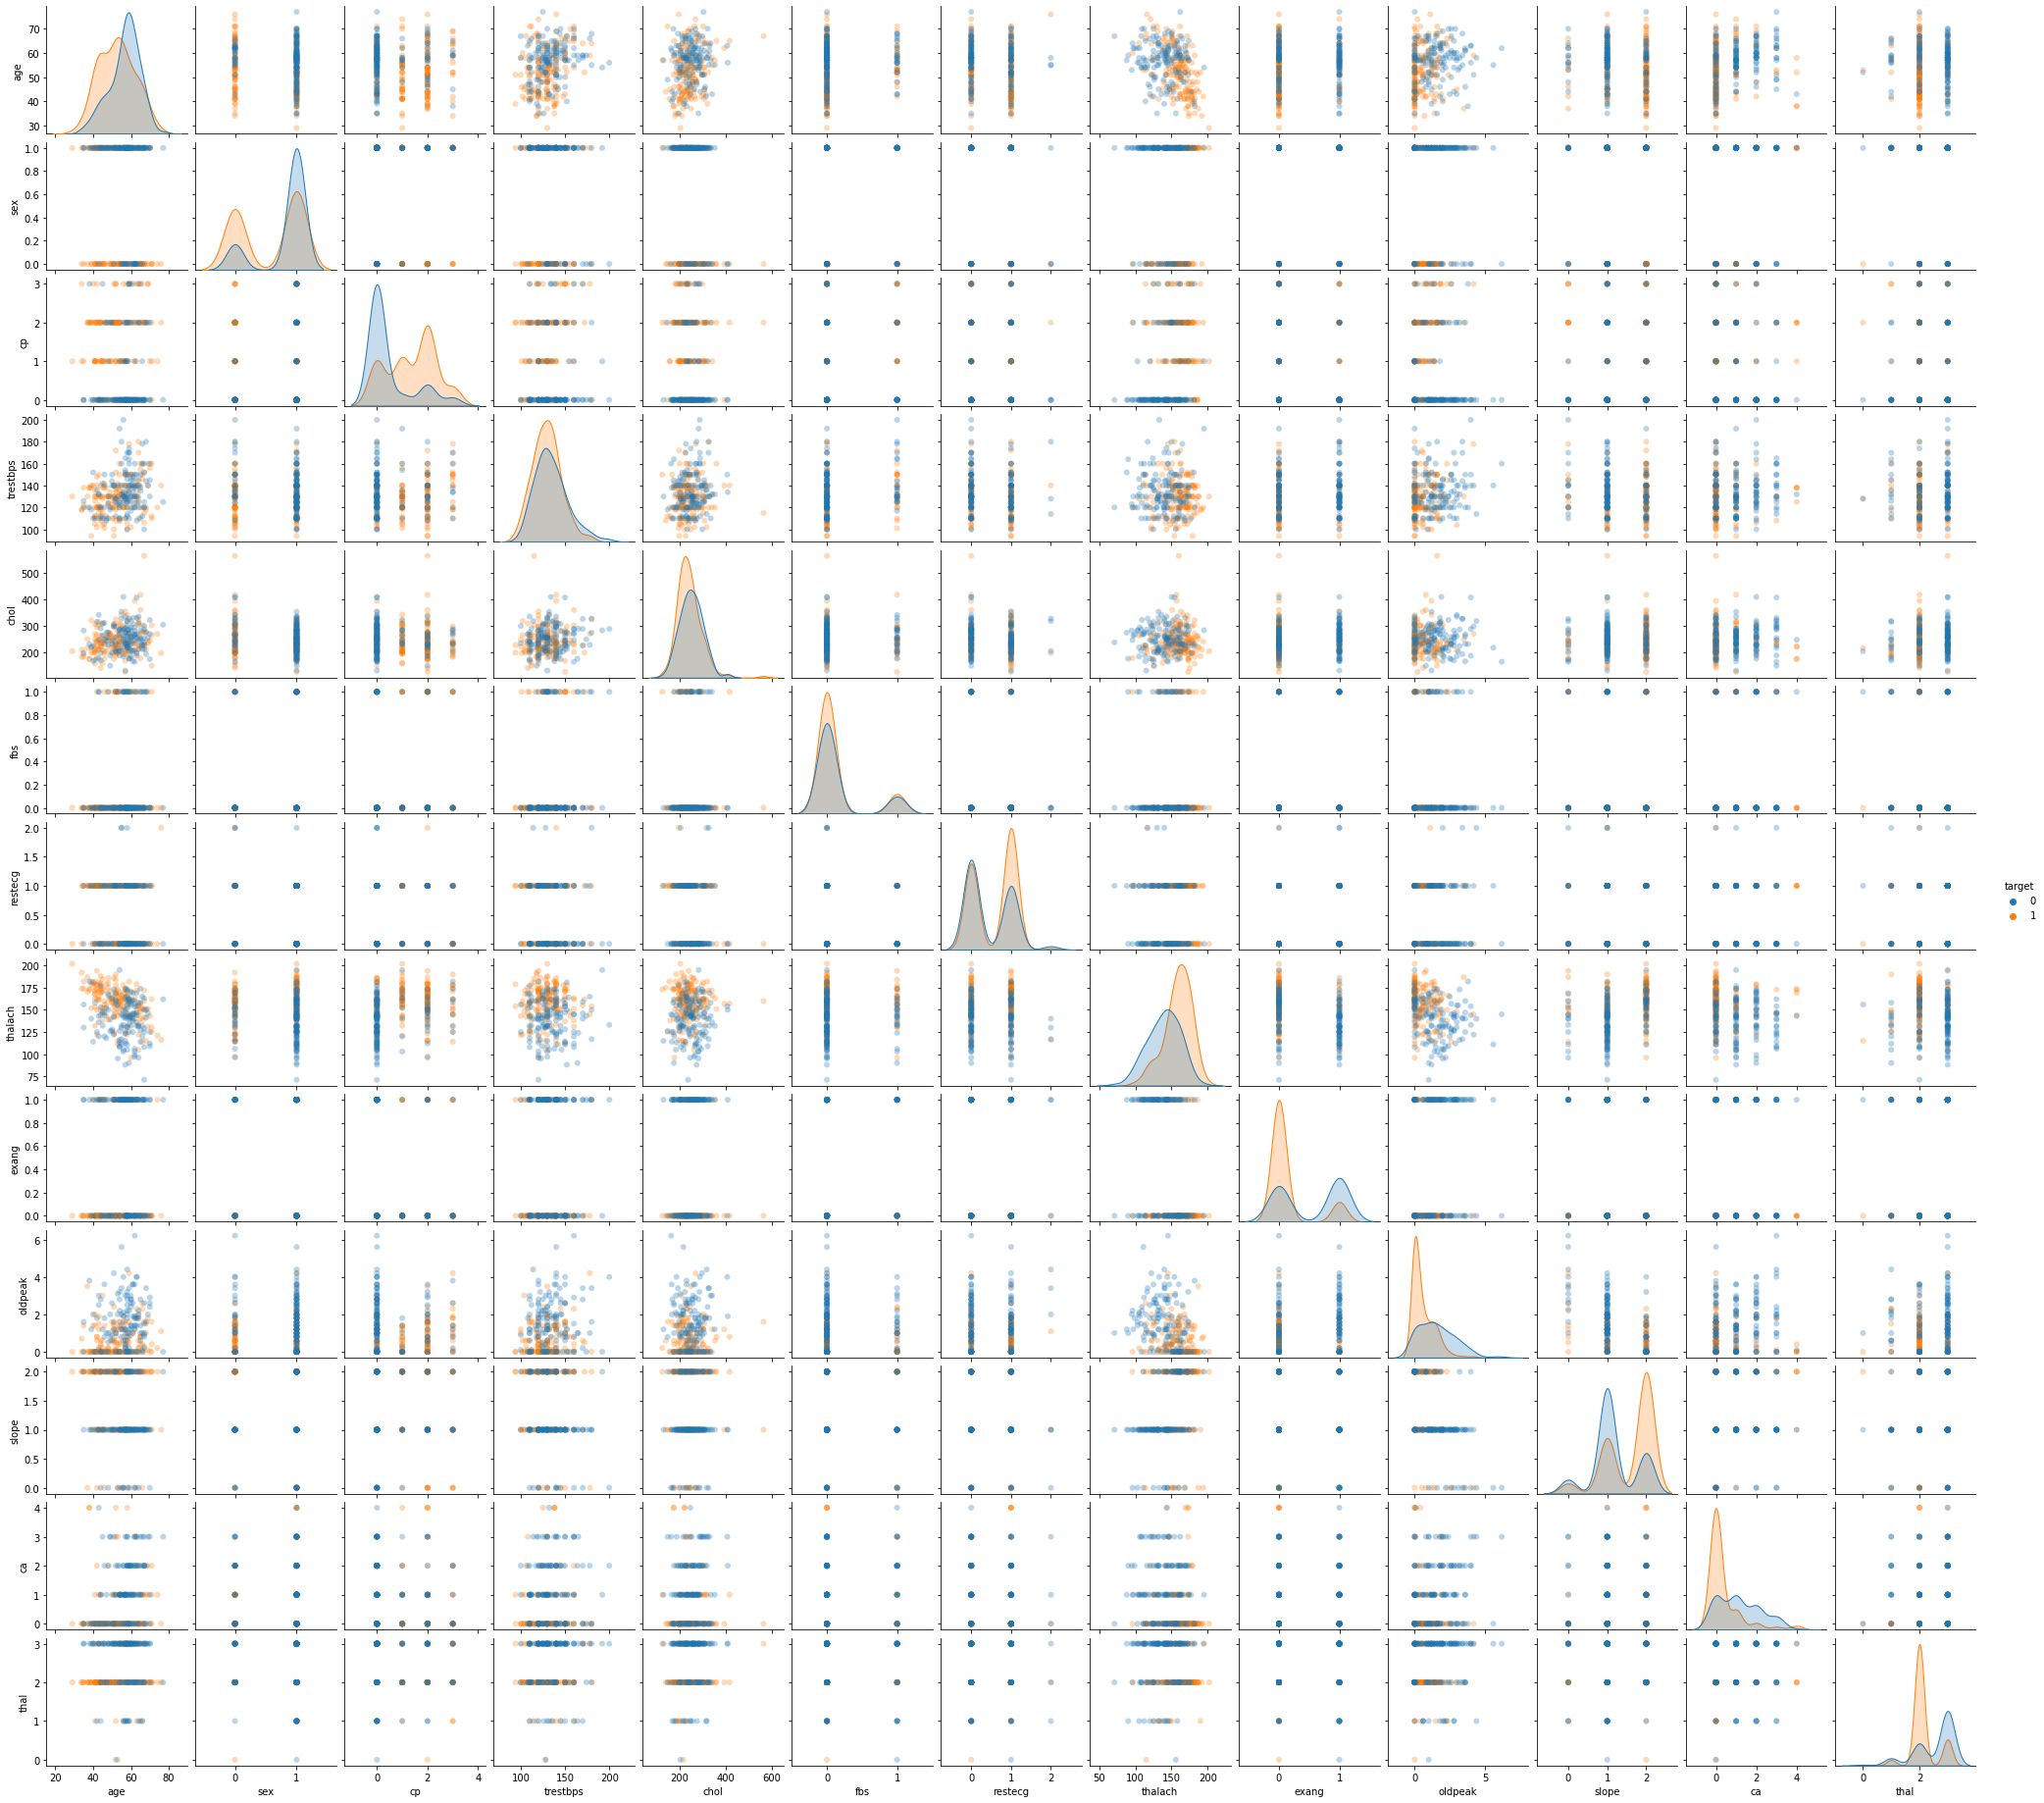

In [17]:
sns.pairplot(df, hue='target', plot_kws=dict(alpha=.3, edgecolor='none'), height=2, aspect=1.1)

<AxesSubplot:xlabel='target', ylabel='count'>

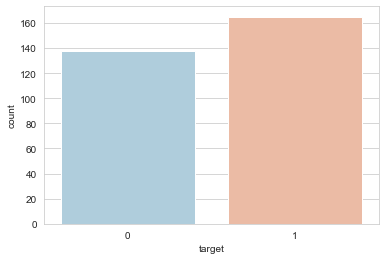

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

#### After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categorical variables.

In [19]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [21]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [22]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [29]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

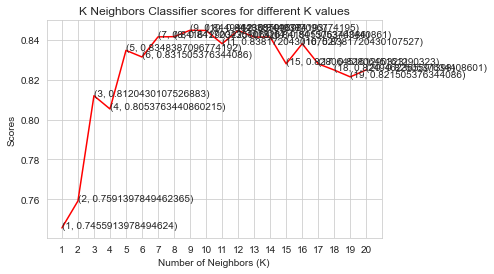

In [30]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [37]:
knn_classifier = KNeighborsClassifier(n_neighbors = 14)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [38]:
score.mean()

0.8415053763440861

In [39]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [40]:
score.mean()

0.8112903225806452

In [70]:
X = df.drop('target', axis=1)   # axis=0 for row, axis=1 for column
y = df['target']

# split data to 80:20 ratio for train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=SEED, stratify=y)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (242, 13)
y_train (242,)
X_test (61, 13)
y_test (61,)


In [71]:
def evaluate(model, X_test , y_test,modelname):
  y_pred1=model.predict(X_test)
  precision    = precision_score(y_test, y_pred1)
  recall       = recall_score(y_test, y_pred1)
  f1score      = f1_score(y_test, y_pred1) 
  rocauc       = roc_auc_score(y_test, y_pred1)
  logloss      = log_loss(y_test, y_pred1)
  accuracy     = accuracy_score(y_test, y_pred1)

  df_model1 = pd.DataFrame({  'model'        : [modelname],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'logloss'      : [logloss],
                             'timetaken'    : [time2]   
                                }) 
  return df_model1

In [72]:
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score, cohen_kappa_score
SEED = 42

In [73]:

%%time
time2=time.time()
print("base model")
base_model = RandomForestClassifier()
base_model.fit(X_train, y_train)
#base_accuracy = evaluate(base_model, X_test, y_test,modelname)
model1 = evaluate(base_model,  X_test,  y_test, 'RandomForest')
model1.timetaken[0] = time.time() - time2

base model
CPU times: total: 141 ms
Wall time: 123 ms


In [74]:
%%time
from sklearn.ensemble import ExtraTreesClassifier

time2=time.time()
print("base model")
base_model1 = ExtraTreesClassifier()
base_model1.fit(X_train, y_train)
model2 = evaluate(base_model1,  X_test,  y_test, 'Extra Tree')
model2.timetaken[0] = time.time() - time2

base model
CPU times: total: 109 ms
Wall time: 131 ms


In [75]:
%%time
time2=time.time()
print("base model")
base_model2 = LogisticRegression()
base_model2.fit(X_train, y_train)
model3 = evaluate(base_model2,  X_test,  y_test, 'Logistic Regression')
model3.timetaken[0] = time.time() - time2

base model
CPU times: total: 15.6 ms
Wall time: 22.5 ms


In [96]:
%%time
time2=time.time()
print("base model")
base_model3 = KNeighborsClassifier(n_neighbors=15)
base_model3.fit(X_train, y_train)
model4 = evaluate(base_model3,  X_test,  y_test, 'KNN')
model4.timetaken[0] = time.time() - time2

base model
CPU times: total: 31.2 ms
Wall time: 12.2 ms


In [97]:
%%time
time2=time.time()
print("base model")
base_model4 = LinearSVC()
base_model4.fit(X_train, y_train)
model5 = evaluate(base_model4,  X_test,  y_test, 'LinearSVC')
model5.timetaken[0] = time.time() - time2

base model
CPU times: total: 15.6 ms
Wall time: 18.6 ms


In [98]:
%%time
time2=time.time()
print("base model")
base_model5 = GaussianNB()
base_model5.fit(X_train, y_train)
model6 = evaluate(base_model5,  X_test,  y_test, 'GaussianNB')
model6.timetaken[0] = time.time() - time2

base model
CPU times: total: 0 ns
Wall time: 9.3 ms


In [99]:
%%time
time2=time.time()
print("base model")
base_model6=SVC()
base_model6.fit(X_train, y_train)
model7 = evaluate(base_model6,  X_test,  y_test, 'SVC')
model7.timetaken[0] = time.time() - time2

base model
CPU times: total: 0 ns
Wall time: 12 ms


In [100]:
%%time
time2=time.time()
print("base model")
base_model7=DecisionTreeClassifier()
base_model7.fit(X_train, y_train)
model8 = evaluate(base_model7,  X_test,  y_test, 'Decision Tree')
model8.timetaken[0] = time.time() - time2

base model
CPU times: total: 15.6 ms
Wall time: 9.61 ms


In [101]:
from sklearn.ensemble import AdaBoostClassifier

In [102]:
%%time
time2=time.time()
print("base model")
base_model8= AdaBoostClassifier()
base_model8.fit(X_train, y_train)
model9 = evaluate(base_model8,  X_test,  y_test, ' Ada Boost')
model9.timetaken[0] = time.time() - time2

base model
CPU times: total: 62.5 ms
Wall time: 65.2 ms


In [103]:
%%time
time2=time.time()
print("base model")
base_model9 = MultinomialNB()
base_model9.fit(X_train, y_train)
model10 = evaluate(base_model9,  X_test,  y_test, 'MultinomialNB')
model10.timetaken[0] = time.time() - time2

base model
CPU times: total: 15.6 ms
Wall time: 10.7 ms


In [104]:
%%time
time2=time.time()
print("base model")
base_model10 =BernoulliNB()
base_model10.fit(X_train, y_train)
model11 = evaluate(base_model10,  X_test,  y_test, 'BernoulliNB')
model11.timetaken[0] = time.time() - time2

base model
CPU times: total: 0 ns
Wall time: 10.1 ms


In [105]:
df_base= pd.concat([model1,model2,model3,model4,model5,model6,model7,model8,model9,model10,model11],axis = 0).reset_index()
df_base.drop('index', axis=1, inplace=True)
df_base

,model,accuracy,precision,recall,f1score,rocauc,logloss,timetaken
0,RandomForest,0.819672,0.775000,0.939394,0.849315,0.808983,6.228422,0.122352
1,Extra Tree,0.819672,0.789474,0.909091,0.845070,0.811688,6.228409,0.129833
2,Logistic Regression,0.803279,0.769231,0.909091,0.833333,0.793831,6.794631,0.021468
3,KNN,0.639344,0.648649,0.727273,0.685714,0.631494,12.456778,0.012180
4,LinearSVC,0.737705,0.742857,0.787879,0.764706,0.733225,9.059469,0.017580
5,GaussianNB,0.819672,0.789474,0.909091,0.845070,0.811688,6.228409,0.009305
6,SVC,0.655738,0.650000,0.787879,0.712329,0.643939,11.890582,0.011970
7,Decision Tree,0.688525,0.684211,0.787879,0.732394,0.679654,10.758137,0.009607
8,Ada Boost,0.786885,0.763158,0.878788,0.816901,0.778680,7.360841,0.065184
9,MultinomialNB,0.721311,0.722222,0.787879,0.753623,0.715368,9.625692,0.009620


# Further Improvement in classifiers can be done with the help of hyperparameter tuning.